<a href="https://colab.research.google.com/github/cybfr/notebooks/blob/main/flocon_de_Koch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[ 3.53525080e-16 -1.66666667e+00 -5.00000000e+00 -3.33333333e+00
 -5.00000000e+00 -1.66666667e+00 -8.88178420e-16  1.66666667e+00
  5.00000000e+00  3.33333333e+00  5.00000000e+00  1.66666667e+00] [ 5.77350269e+00  2.88675135e+00  2.88675135e+00  0.00000000e+00
 -2.88675135e+00 -2.88675135e+00 -5.77350269e+00 -2.88675135e+00
 -2.88675135e+00 -2.22044605e-15  2.88675135e+00  2.88675135e+00]


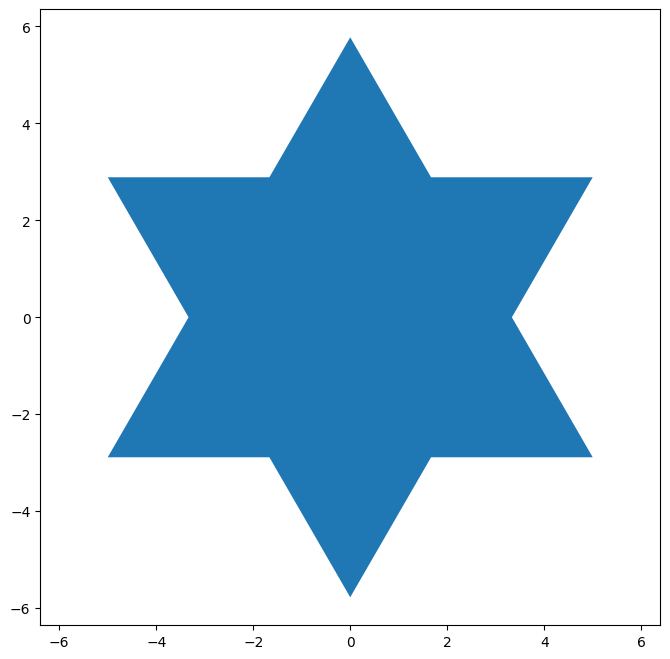

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def koch_snowflake(order, scale=10):
    """
    Return two lists x, y of point coordinates of the Koch snowflake.

    Parameters
    ----------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """
    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3

            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)  # end points
            dp = p2 - p1  # connection vectors

            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y

x, y = koch_snowflake(order=1)
print(x,y)

plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.fill(x, y)
plt.show()
